## Parameters exploration

In [1]:
import numpy
import math
from matplotlib import pyplot
from matplotlib.pyplot import cm
import matplotlib.animation as animation
from matplotlib import ticker
%matplotlib inline
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

def ftcstest(P0,nt,dt,dx,dy,D,cphi,s1,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj):
    
    # Define some constants 
    sigma_x = D * dt / dx**2
    sigma_y = D * dt / dy**2    
     
    # Integrate in time.
    P = P0.copy()
    # Estimate number of grid points in x- and y-direction
    ny, nx = P.shape
    Pcenterline = 0.0 * numpy.ones((nx, nt),dtype='uint8')
    Pcenterline1 = 0.0 * numpy.ones((nx, nt),dtype='uint8')
    Pcenterline2 = 0.0 * numpy.ones((nx, nt),dtype='uint8')

    P1 = numpy.linspace(0.0, 0.0, num=nt)
    P2 = numpy.linspace(0.0, 0.0, num=nt)
    P21 = numpy.linspace(0.0, 0.0, num=nt)
    P22 = numpy.linspace(0.0, 0.0, num=nt)
    P23 = numpy.linspace(0.0, 0.0, num=nt)
    P24 = numpy.linspace(0.0, 0.0, num=nt) 
    P25 = numpy.linspace(0.0, 0.0, num=nt) 

    P3 = numpy.linspace(0.0, 0.0, num=nt) # for the production center
    
    Pglob = 0.0 * numpy.ones((ny, nx, nt),dtype='uint8')    
    # Indices of the model center
    I, J = int(nx/ 2), int(ny/ 2) 
    # Time loop
    for n in range(nt):
        print(n, end='\r')
        # store old overpressure field 
        Pn = P.copy()      
        # loops over spatial grid    
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                P[j, i] = (Pn[j, i]  
                           +sigma_x * (Pn[j, i+1] - 2.0 * Pn[j, i] + Pn[j, i-1])
                           +sigma_y * (Pn[j+1, i] - 2.0 * Pn[j, i] + Pn[j-1, i]))
                if i==int(xinj/dx) and j==int(yinj/dy):
                    if n*dt <= tinj:                        
                        P[j,i] = P[j,i] + s1[n]/cphi                      
                        P1[n] = P[j,i]                  
                    else: # constant injected volume Vi
                        s1[n]=0
                        P[j,i] = P[j,i] + s1[n]/cphi 
                        P1[n] = P[j,i] # pressure at the injection point                        
                if i==int(xprod/dx) and j==int(yprod/dy): # production point
                    if n*dt <= tinj:
                        P[j,i] = P[j,i] + s2[n]/cphi  
                        P3[n] = P[j,i] 
                    else: # constant injected volume Vi
                        s2[n]=0
                        P[j,i] = P[j,i] + s2[n]/cphi
                        P3[n] = P[j,i]                        
                if i==int(xob/dx) and j==int(yob/dy): # observation point           
                    P2[n] = P[j,i] 
                if i==int(xob1/dx) and j==int(yob1/dy): # observation point           
                    P21[n] = P[j,i]
                if i==int(xob2/dx) and j==int(yob2/dy): # observation point           
                    P22[n] = P[j,i] 
                if i==int(xob3/dx) and j==int(yob3/dy): # observation point   
                    P23[n] = P[j,i]
                if i==int(xob4/dx) and j==int(yob4/dy): # observation point   
                    P24[n] = P[j,i]
                if i==int(xob5/dx) and j==int(yob5/dy): # observation point 
                    P25[n] = P[j,i] 
                if j==int(yob/dy) :  # observation profile
                    Pcenterline[i,n]=P[j,i]
                if j==int(yob1/dy) :  # observation profile
                    Pcenterline1[i,n]=P[j,i]
                if j==int(yob2/dy) :  # observation profile
                    Pcenterline2[i,n]=P[j,i]
        Pglob[:,:,n]=P[:,:]
        # Check if the center of the domain has reached P = 700e6 Pa.
        if P[J, I] >= 700.0e6:
            break            
    print('[time step {}] Center at P={:.2f} Pa at t={:.2f} h, {:.2f} days'
          .format(n + 1, P[J, I], (n + 1) * dt, (n + 1) * dt / 24))   
    return P,P1,P2,P21,P22,P23,P24,P25,Pcenterline,Pcenterline1,Pcenterline2,Pglob


dx =  66.66666666666667 m and dy =  66.66666666666667 m and dt =  0.015432098765432105 h and nt =  15551
For a monopole :
injection point :  10000 10000
[time step 15551] Center at P=84048.37 Pa at t=239.98 h, 10.00 days
Minimum activation pressure egal to  -229.25458123343458  bars
[time step 15551] Center at P=0.00 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=14008.06 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=28016.12 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=42024.19 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=56032.25 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=70040.31 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=98056.43 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=112064.50 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=126072.56 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=140080.62 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=154088.

C:\Users\bvallier\AppData\Local\Temp\ipykernel_13108\2573068171.py:187: RuntimeWarning: invalid value encountered in double_scalars
  ratioP=[max(P0211)/max(P0221),max(P01214)/max(P01224),max(P02212)/max(P02222),max(P03213)/max(P03223),max(P04214)/max(P04224),max(P05215)/max(P05225),max(P21)/max(P22),max(P211)/max(P221),max(P212)/max(P222),max(P213)/max(P223),max(P214)/max(P224),max(P215)/max(P225)]
C:\Users\bvallier\AppData\Local\Temp\ipykernel_13108\2573068171.py:197: RuntimeWarning: invalid value encountered in double_scalars
  ratioP01=[max(P0211)/max(P0251),max(P01214)/max(P01254),max(P02212)/max(P02252),max(P03213)/max(P03253),max(P04214)/max(P04254),max(P05215)/max(P05255),max(P21)/max(P25),max(P211)/max(P251),max(P212)/max(P252),max(P213)/max(P253),max(P214)/max(P254),max(P215)/max(P255)]
C:\Users\bvallier\AppData\Local\Temp\ipykernel_13108\2573068171.py:198: RuntimeWarning: invalid value encountered in double_scalars
  ratioP008=[max(P0211)/max(P0241),max(P01214)/max(P01244),m

Text(0.5, 0, 'Total injected volume [m$^3$]')

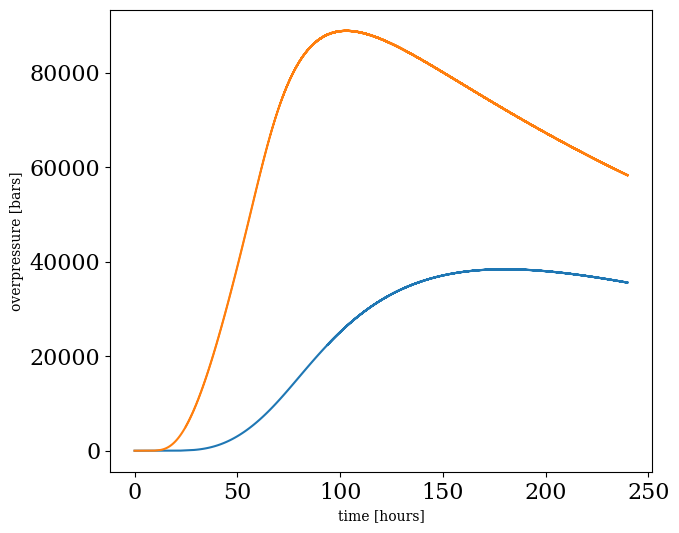

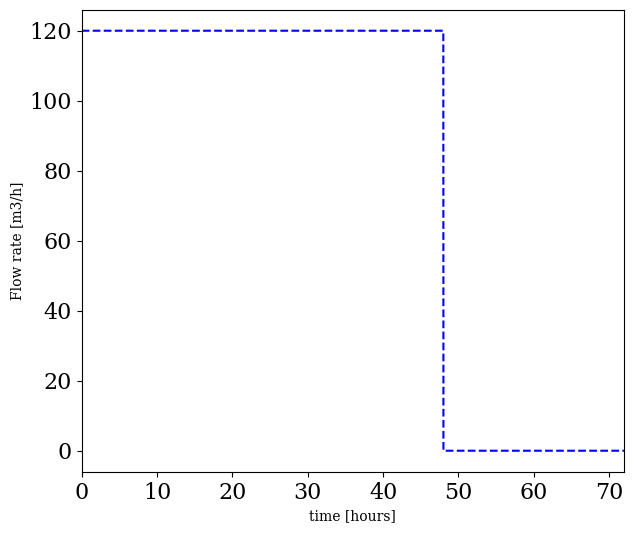

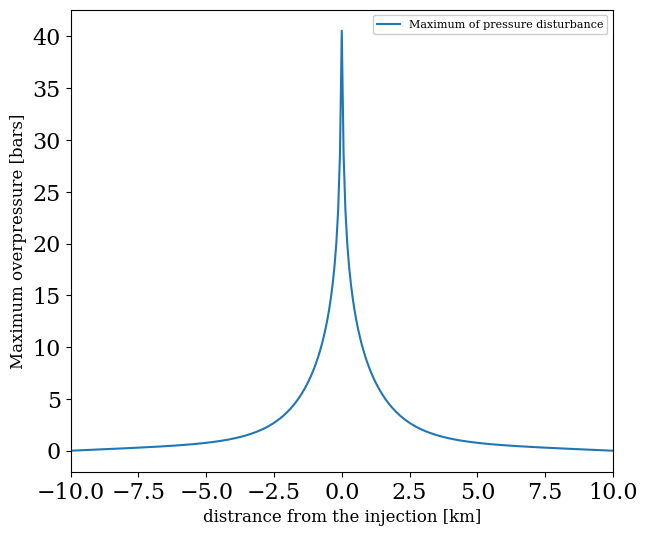

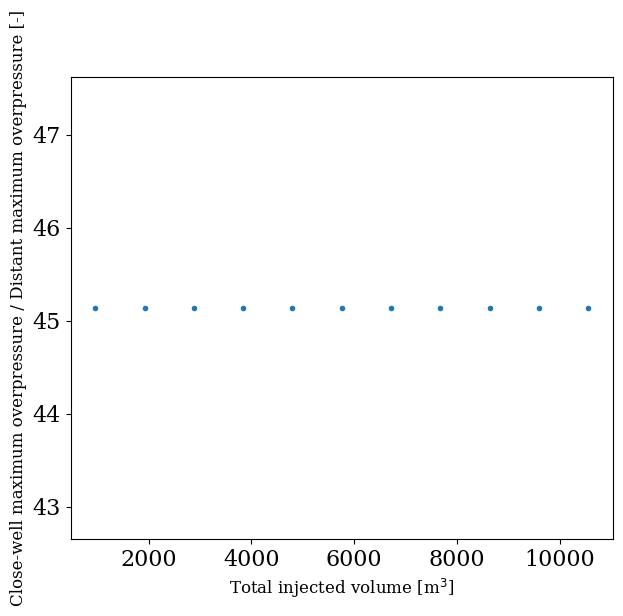

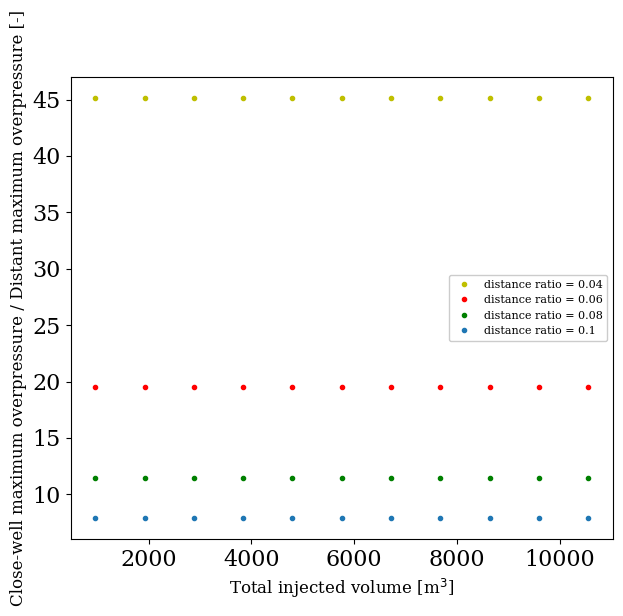

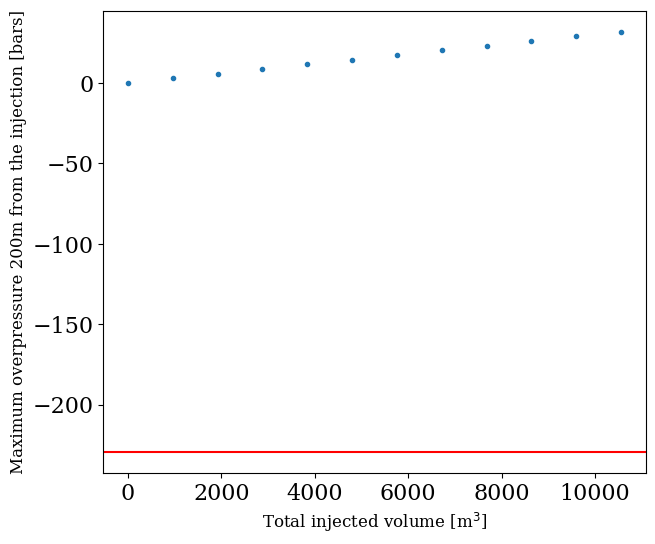

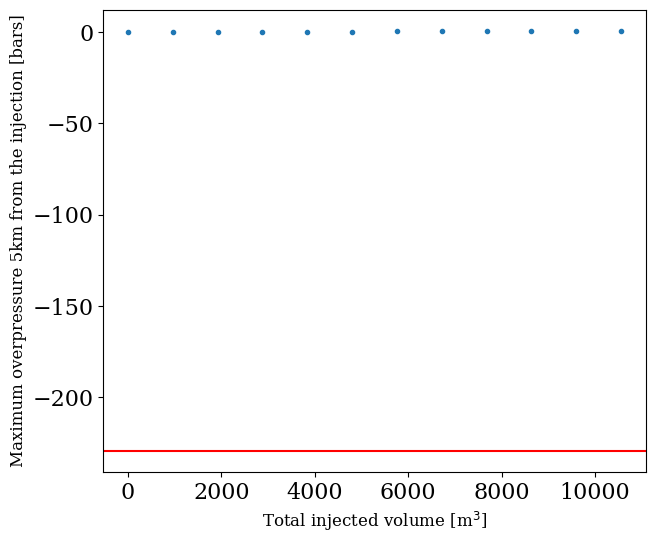

In [2]:
## Main code where parameters are set.
Lx = 20000.  # length of the fault in the x direction in m
Ly = 20000.  # height of the fault in the y direction in m
nx = 301 # number of points in the x direction
ny = 301  # number of points in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction
kappa = 1e-13 # permeability in m^2
compr = 5e-10 #water compressibility in 1/Pa
phi = 0.01 # porosity in 1/Pa
mu = 1e-3 # water dynamic viscosity in Pa.s
cphi = compr*phi #water compressibility times porosity in 1/Pa
D = kappa/(mu*cphi)*3600 # pressure diffusivity in m^2/h 
Qinj=120 #in m^3/h
h=70 # permeable zone thickness in m

## time, period, pulsation, volume parameters for the oscillating injection
tob=24*10 # observation time in h (here one month)
tinj=48 # time in h of the stabilisation of the injection
tp=1*24 # period of the oscillation
w=2*math.pi/tp # pulsation in 1/h
Vi=Qinj*tinj # injected volume in m^3 

## space
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

## observation points less and less close to the injection and production points
xinj=int(Lx/2) # injection point x for monopole
yinj=int(Ly/2) # injection point y for monopole

# obs points
xob=xinj
yob=yinj
xob1=int(Lx/2+200) # obversation point x
yob1=int(Ly/2+200) # obversation point y
xob2=int(Lx/2+5000) # obversation point x
yob2=int(Ly/2+5000) # obversation point y
xob3=int(Lx/2+3333) # obversation point x
yob3=int(Ly/2+3333) # obversation point y
xob4=int(Lx/2+2500) # obversation point x
yob4=int(Ly/2+2500) # obversation point y
xob5=int(Lx/2+2000) # obversation point x
yob5=int(Ly/2+2000) # obversation point y

yinjdip=int(Ly/2) # injection point y for dipole
yprod=int(Ly/2) # injection point y
xinjdip=int(Lx/2+50)
xprod=int(Lx/2-50)

## Compute the initial temperature distribution.
Pb = 0.0  # temperature at the left and bottom boundaries
P0 = 0.0 * numpy.ones((ny, nx))
P0[0, :] = Pb
P0[:, 0] = Pb
## Set the time-step size based on CFL limit.
sigma = 0.25
dt = sigma * min(dx, dy)**2 / D  # time-step size
nt=int(tob/dt)
## time
t = numpy.linspace(0.0, tob, num=nt)
print('dx = ',dx,'m and dy = ',dy,'m and dt = ',dt,'h and nt = ',nt)

## Define the source for the injection point
csource=(Vi/(dx*dy*h))*(dt/tinj) # linear rise of the injected volume

s1=numpy.linspace(csource, csource, num=nt) # in m^3/h/dx^2
s2=numpy.linspace(0.,0., num=nt) # monopole 

## Define the locations along a gridline.
P1 = numpy.linspace(0.0, 0.0, num=nt)
P2 = numpy.linspace(0.0, 0.0, num=nt)
P3 = numpy.linspace(0.0, 0.0, num=nt)
Pcenterline=0.0 * numpy.ones((nx, nt))

## Compute the pressure distribution with the finite difference method for a monopole
print('For a monopole :')
print('injection point : ',xinj,yinj)
P,P1,P2,P21,P22,P23,P24,P25,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s1,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)

## Calculation of Pmax ------------------------------------------------
# Pmax(r)
Pmax = numpy.linspace(0.0, 0.0, num=nx)
for i in range(nx):
    Pmax[i]=max(Pglob[int(yinj/dy),i,:])

Qinj0=0 #in m^3/h
s0=numpy.linspace(((Qinj0*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj0*tinj)/(dx*dy*h))*(dt/tinj), num=nt) # in m^3/h/dx^2
P,P01,P02,P0211,P0221,P0231,P0241,P0251,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s0,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)


Qinj01=20 #in m^3/h
s01=numpy.linspace(((Qinj01*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj01*tinj)/(dx*dy*h))*(dt/tinj), num=nt) 
P,P011,P012,P01214,P01224,P01234,P01244,P01254,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s01,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)


Qinj02=40 #in m^3/h
s02=numpy.linspace(((Qinj02*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj02*tinj)/(dx*dy*h))*(dt/tinj), num=nt)
P,P021,P022,P02212,P02222,P02232,P02242,P02252,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s02,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)


Qinj03=60 #in m^3/h
s03=numpy.linspace(((Qinj03*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj03*tinj)/(dx*dy*h))*(dt/tinj), num=nt) 
P,P031,P032,P03213,P03223,P03233,P03243,P03253,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s03,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)


Qinj04=80 #in m^3/h
s04=numpy.linspace(((Qinj04*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj04*tinj)/(dx*dy*h))*(dt/tinj), num=nt) 
P,P041,P042,P04214,P04224,P04234,P04244,P04254,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s04,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)


Qinj05=100 #in m^3/h
s05=numpy.linspace(((Qinj05*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj05*tinj)/(dx*dy*h))*(dt/tinj), num=nt) 
P,P051,P052,P05215,P05225,P05235,P05245,P05255,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s05,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)

# -------------------------------------------------------------------------------------------------

Qinj1=140 #in m^3/h
s11=numpy.linspace(((Qinj1*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj1*tinj)/(dx*dy*h))*(dt/tinj), num=nt) 
P,P1,P2,P211,P221,P231,P241,P251,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s11,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)


Qinj2=160 #in m^3/h
s12=numpy.linspace(((Qinj2*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj2*tinj)/(dx*dy*h))*(dt/tinj), num=nt)
P,P1,P2,P212,P222,P232,P242,P252,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s12,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)


Qinj3=180 #in m^3/h
s13=numpy.linspace(((Qinj3*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj3*tinj)/(dx*dy*h))*(dt/tinj), num=nt) 
P,P1,P2,P213,P223,P233,P243,P253,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s13,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)


Qinj4=200 #in m^3/h
s14=numpy.linspace(((Qinj4*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj4*tinj)/(dx*dy*h))*(dt/tinj), num=nt) 
P,P1,P2,P214,P224,P234,P244,P254,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s14,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)


Qinj5=220 #in m^3/h
s15=numpy.linspace(((Qinj5*tinj)/(dx*dy*h))*(dt/tinj), ((Qinj5*tinj)/(dx*dy*h))*(dt/tinj), num=nt) 
P,P1,P2,P215,P225,P235,P245,P255,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcstest(P0,nt,dt,dx,dy,D,cphi,s15,s2,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,xprod,yprod,tinj)


ratioP=[max(P0211)/max(P0221),max(P01214)/max(P01224),max(P02212)/max(P02222),max(P03213)/max(P03223),max(P04214)/max(P04224),max(P05215)/max(P05225),max(P21)/max(P22),max(P211)/max(P221),max(P212)/max(P222),max(P213)/max(P223),max(P214)/max(P224),max(P215)/max(P225)]
maxPnear=[max(P0211)/1e5,max(P01214)/1e5,max(P02212)/1e5,max(P03213)/1e5,max(P04214)/1e5,max(P05215)/1e5,max(P21)/1e5,max(P211)/1e5,max(P212)/1e5,max(P213)/1e5,max(P214)/1e5,max(P215)/1e5]
maxPfar=[max(P0221)/1e5,max(P01224)/1e5,max(P02222)/1e5,max(P03223)/1e5,max(P04224)/1e5,max(P05225)/1e5,max(P22)/1e5,max(P221)/1e5,max(P222)/1e5,max(P223)/1e5,max(P224)/1e5,max(P225)/1e5]
assioV=[Qinj0*tinj,Qinj01*tinj,Qinj02*tinj,Qinj03*tinj,Qinj04*tinj,Qinj05*tinj,Qinj*tinj,Qinj1*tinj,Qinj2*tinj,Qinj3*tinj,Qinj4*tinj,Qinj5*tinj]

ratioP01=[max(P0211)/max(P0251),max(P01214)/max(P01254),max(P02212)/max(P02252),max(P03213)/max(P03253),max(P04214)/max(P04254),max(P05215)/max(P05255),max(P21)/max(P25),max(P211)/max(P251),max(P212)/max(P252),max(P213)/max(P253),max(P214)/max(P254),max(P215)/max(P255)]
ratioP008=[max(P0211)/max(P0241),max(P01214)/max(P01244),max(P02212)/max(P02242),max(P03213)/max(P03243),max(P04214)/max(P04244),max(P05215)/max(P05245),max(P21)/max(P24),max(P211)/max(P241),max(P212)/max(P242),max(P213)/max(P243),max(P214)/max(P244),max(P215)/max(P245)]
ratioP006=[max(P0211)/max(P0231),max(P01214)/max(P01234),max(P02212)/max(P02232),max(P03213)/max(P03233),max(P04214)/max(P04234),max(P05215)/max(P05235),max(P21)/max(P23),max(P211)/max(P231),max(P212)/max(P232),max(P213)/max(P233),max(P214)/max(P234),max(P215)/max(P235)]
ratioP004=ratioP

# save Pmax_rclose/Pmax_rfar=f(Vi) for r=0.1
with open('save_profiles/taux_Pmax_vs_Vi_r_01.dat', 'w') as f:
    for ip,p in enumerate(ratioP01):
        f.write(str(assioV[ip])+' '+str(p)+' \n')

# save Pmax_rclose/Pmax_rfar=f(Vi) for r=0.08
with open('save_profiles/taux_Pmax_vs_Vi_r_008.dat', 'w') as f:
    for ip,p in enumerate(ratioP008):
        f.write(str(assioV[ip])+' '+str(p)+' \n')

# save Pmax_rclose/Pmax_rfar=f(Vi) for r=0.06
with open('save_profiles/taux_Pmax_vs_Vi_r_006.dat', 'w') as f:
    for ip,p in enumerate(ratioP006):
        f.write(str(assioV[ip])+' '+str(p)+' \n')

# save Pmax_rclose/Pmax_rfar=f(Vi) for r=0.04
with open('save_profiles/taux_Pmax_vs_Vi_r_004.dat', 'w') as f:
    for ip,p in enumerate(ratioP004):
        f.write(str(assioV[ip])+' '+str(p)+' \n')
